In [1]:
import pandas as pd
data = pd.read_csv('breast-cancer-wisconsin.data',names=[
    'Sample_code_number',      
    'Clump_Thickness',             
    'Uniformity_of_Cell_Size',       
    'Uniformity_of_Cell_Shape ',     
    'Marginal_Adhesion',              
    'Single_Epithelial_Cell_Size',    
    'Bare_Nuclei',                   
    'Bland_Chromatin',               
    'Normal_Nucleoli',                
    'Mitoses',                       
    'Class'
])
data.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
data.dtypes

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [3]:
def is_non_numeric(x):
    return not x.isnumeric() 

In [4]:
mask= data['Bare_Nuclei'].apply(is_non_numeric)

In [5]:

#data_non_numeric = data[mask]
#data_non_numeric.head()
data_numeric = data[~mask]
data_numeric.head()



,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
print(len(data))
print(len(data_numeric))

699
683


In [7]:
data_numeric.dtypes

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
data_numeric['Bare_Nuclei']=data_numeric['Bare_Nuclei'].astype('int64')

C:\Users\user\AppData\Local\Temp\ipykernel_13000\3985407380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['Bare_Nuclei']=data_numeric['Bare_Nuclei'].astype('int64')


In [9]:
data_numeric.dtypes

Sample_code_number             int64
Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [10]:
data_input = data_numeric.drop(columns=['Sample_code_number','Class'])

In [11]:
data_output = data_numeric['Class']

In [12]:
data_input.head(100)

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
97,5,1,1,1,2,1,3,1,1
98,9,6,9,2,10,6,2,9,10
99,7,5,6,10,5,10,7,9,4
100,10,3,5,1,10,5,3,10,2


In [13]:
data_output.head(100)

0      2
1      2
2      2
3      2
4      2
      ..
97     2
98     4
99     4
100    4
101    4
Name: Class, Length: 100, dtype: int64

In [14]:
data_output.unique()

array([2, 4], dtype=int64)

In [15]:
data_output=data_output.replace({2:0,4:1})

In [16]:
data_output.unique()

array([0, 1], dtype=int64)

In [17]:
data_output.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test = train_test_split(data_input,data_output,test_size=0.33,random_state=2)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.33,random_state=2)


In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(306, 9)
(306,)
(151, 9)
(151,)
(226, 9)
(226,)


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier(max_depth=2,random_state=2)

In [22]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
y_pred_train=model.predict(x_train)
y_pred_val=model.predict(x_val)

In [25]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_val,y_pred_val))

0.9705882352941176
0.9536423841059603


In [26]:
max_depth_values=[1,2,3,4,5,6,7,8]
train_accuracy_values=[]
val_accuracy_values=[]
for max_depth_val in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth_val,random_state=2)
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_val=model.predict(x_val)
    acc_train= accuracy_score(y_train,y_pred_train)
    acc_val= accuracy_score(y_val,y_pred_val)
    train_accuracy_values.append(acc_train)
    val_accuracy_values.append(acc_val)

    
    
    

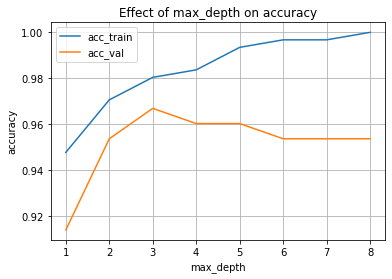

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(max_depth_values,train_accuracy_values,label='acc_train')
plt.plot(max_depth_values,val_accuracy_values,label='acc_val')
plt.legend()
plt.grid(axis='both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of max_depth on accuracy')
plt.show()



In [28]:
model_best = DecisionTreeClassifier(max_depth=3,random_state=2)
model_best.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=2)

In [29]:
y_pred_test = model_best.predict(x_test)
print(accuracy_score(y_test,y_pred_test))

0.9292035398230089


In [30]:
import pickle
with open('saved-model','wb') as f:
    pickle.dump(model_best,f)

In [31]:
with open('saved-model','rb') as f:
    pickle.load(f)

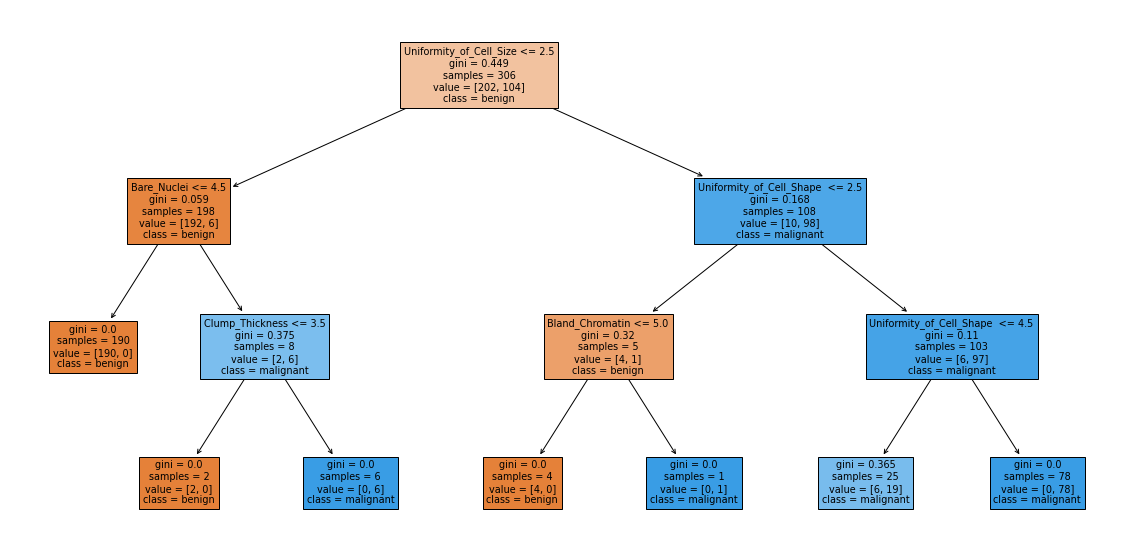

In [32]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model_best,feature_names=['Clump_Thickness',             
    'Uniformity_of_Cell_Size',       
    'Uniformity_of_Cell_Shape ',     
    'Marginal_Adhesion',              
    'Single_Epithelial_Cell_Size',    
    'Bare_Nuclei',                   
    'Bland_Chromatin',               
    'Normal_Nucleoli',                
    'Mitoses'], class_names=['benign','malignant'], filled=True)
plt.show()
    
            

In [33]:
model_best.feature_importances_

array([0.02340327, 0.83879425, 0.05794766, 0.        , 0.        ,
       0.06737306, 0.01248175, 0.        , 0.        ])

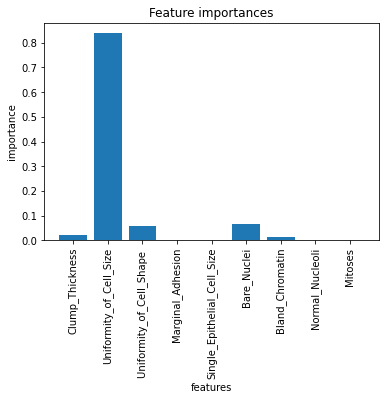

In [34]:
feature_names=['Clump_Thickness',             
    'Uniformity_of_Cell_Size',       
    'Uniformity_of_Cell_Shape ',     
    'Marginal_Adhesion',              
    'Single_Epithelial_Cell_Size',    
    'Bare_Nuclei',                   
    'Bland_Chromatin',               
    'Normal_Nucleoli',                
    'Mitoses']
plt.bar(feature_names,model_best.feature_importances_)
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.title('Feature importances')
plt.show()

In [35]:
test_input_data = (9,6,9,2,10,6,2,9,10)
import numpy as np
test_input_data_arr = np.asarray(test_input_data)
test_input_data_reshaped = test_input_data_arr.reshape(1,-1)
prediction = model_best.predict(test_input_data_reshaped)
if prediction[0] == 0:
    print("Prediction is: 0 is //The person has benign disease //" )
else:
    print("Prediction is: 1 is //The person has malignant disease //")

Prediction is: 1 is //The person has malignant disease //


In [36]:
test_input_data = (5,1,1,1,2,1,3,1,1)
import numpy as np
test_input_data_arr = np.asarray(test_input_data)
test_input_data_reshaped = test_input_data_arr.reshape(1,-1)
prediction = model_best.predict(test_input_data_reshaped)
if prediction[0] == 0:
        print("Prediction is: 0 is //The person has benign disease //" )
else:
    print("Prediction is: 1 is //The person has malignant disease //")

Prediction is: 0 is //The person has benign disease //
